In [1]:
import pandas as pd
import numpy as np

#### запись %matplotlib inline обозначает, что мы хотим получать визуализацию данных прямо здесь

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [11]:
students_performance.columns = students_performance.columns.str.replace(" ", "_")

In [12]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Гистограмма по math_score:

<AxesSubplot:>

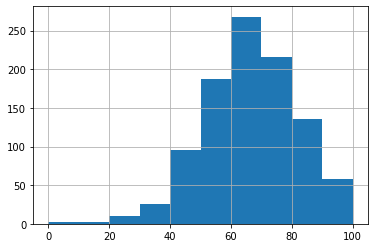

In [17]:
students_performance.math_score.hist()

## График корреляции между перменными math_score и reading_score

### scatter = разброс:

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

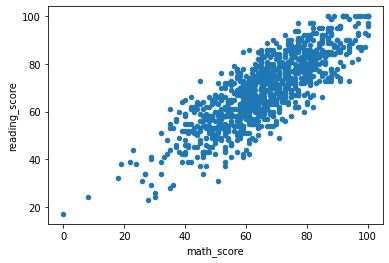

In [20]:
students_performance.plot.scatter(x='math_score', y='reading_score')

### Если в конце строки поставить " ; " , то дополнительная надпись выводится не будет:

#### График с регрессионной прямой:

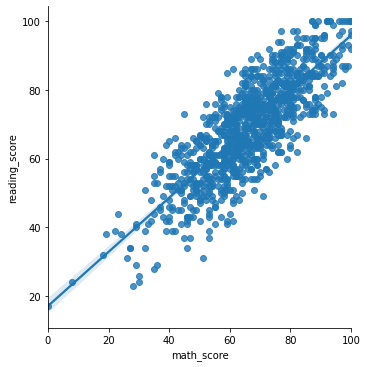

In [24]:
sns.lmplot(x='math_score', y='reading_score', data=students_performance);

### Добавим группирующую переменную с помощью hue=

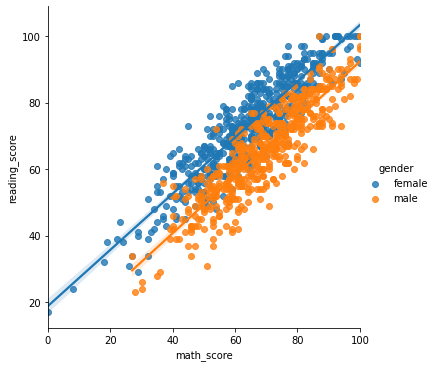

In [25]:
sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance);

### Удалим регресионную прямую с помощью fit_reg=

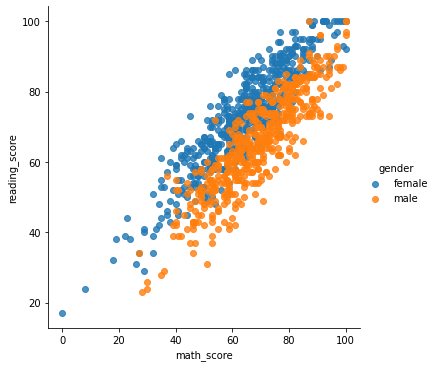

In [26]:
sns.lmplot(x='math_score', y='reading_score', hue='gender', fit_reg=False, data=students_performance);

### Изменим название осей, для этого наш график поместим в переменную:

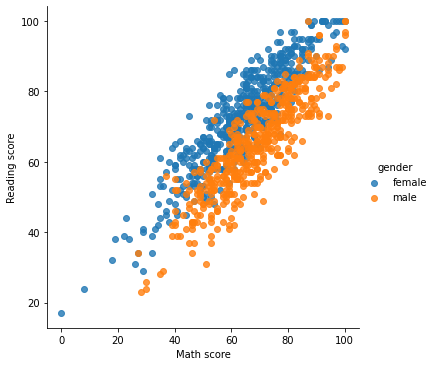

In [32]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', fit_reg=False, data=students_performance)
ax.set_xlabels("Math score")
ax.set_ylabels('Reading score');

## Задание. Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

In [33]:
df_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

In [34]:
df_salary.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


### kind=  это вид графика (по умолчанию line)

<AxesSubplot:>

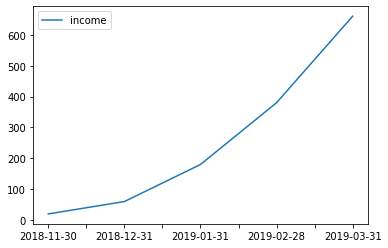

In [50]:
df_salary.plot(kind='line')

<AxesSubplot:>

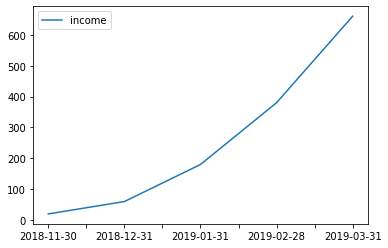

In [39]:
df_salary.plot()

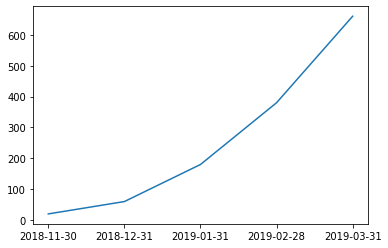

In [51]:
plt.plot(df_salary.index, df_salary.income)

<AxesSubplot:ylabel='income'>

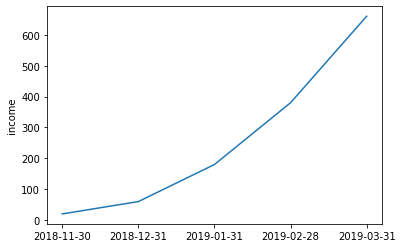

In [52]:
sns.lineplot(x=df_salary.index, y=df_salary.income)

<AxesSubplot:>

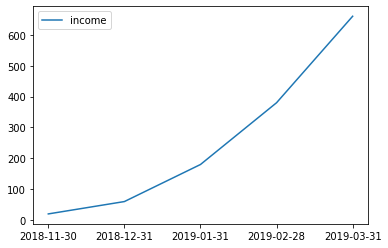

In [54]:
sns.lineplot(data=df_salary)

<AxesSubplot:>

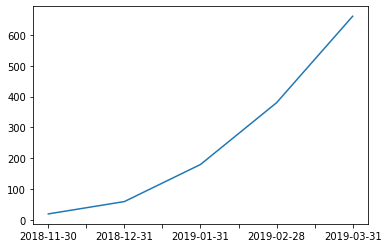

In [55]:
df_salary.income.plot()

<AxesSubplot:>

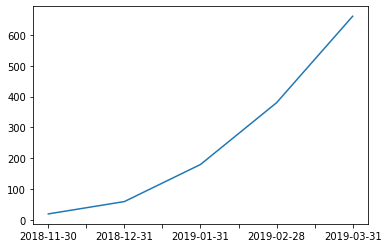

In [56]:
df_salary['income'].plot()

## Задание 2. Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа (например: 3).

In [74]:
df_exercise = pd.read_csv('DataSets/dataset_209770_6.txt', sep=" ")

In [75]:
df_exercise.head()

,x,y
0,404.470533,1411.442588
1,1102.429483,904.085142
2,316.630302,101.845386
3,1304.179879,600.444952
4,202.736297,1302.685658


<AxesSubplot:xlabel='x', ylabel='y'>

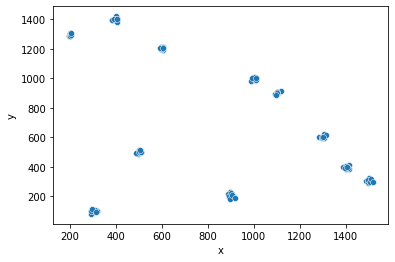

In [76]:
sns.scatterplot(x='x', y='y', data=df_exercise)

## Задание 3. Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

### Чтобы график отображался как на картинках, добавьте

### g = # ваш код для создания теплокарты, укажите параметр cmap="viridis" для той же цветовой схемы
### g.xaxis.set_ticks_position('top')
### g.xaxis.set_tick_params(rotation=90)

In [85]:
df_genom = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)

In [86]:
df_genom.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


### set_ticks_position устанавливает позицию надписи по оси X

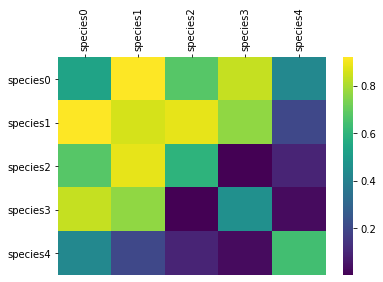

In [91]:
g = sns.heatmap(df_genom, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

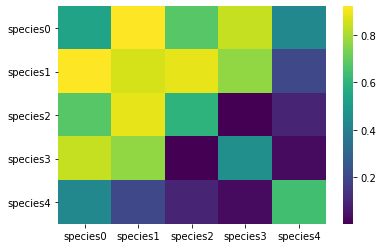

In [89]:
g = sns.heatmap(df_genom, cmap="viridis")

### Задача 4. Пришло время узнать, кто самый главный рак какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.

In [92]:
df_dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [93]:
df_dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [128]:
df_dota = df_dota.assign(count_roles = [len(row.split(",")) for row in df_dota.roles])

In [129]:
df_dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles,count_roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


In [133]:
df_dota.count_roles.mode()

0    4
dtype: int64

In [153]:
df_dota.agg({'count_roles' : 'value_counts'})

,count_roles
4,38
5,33
3,28
2,9
6,8
1,1


<AxesSubplot:>

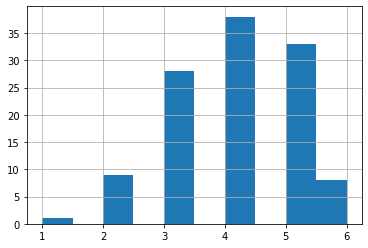

In [162]:
df_dota.count_roles.hist()

<AxesSubplot:>

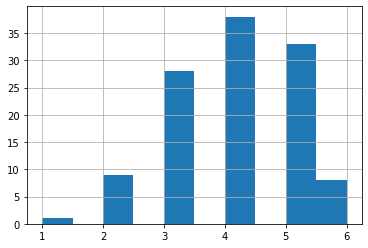

In [167]:
df_dota.roles.str.split(',').apply(len).hist()

## Задача 5. Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй

for column in df:
    # Draw distribution with that column

In [171]:
df_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)

In [172]:
df_iris.head(10)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


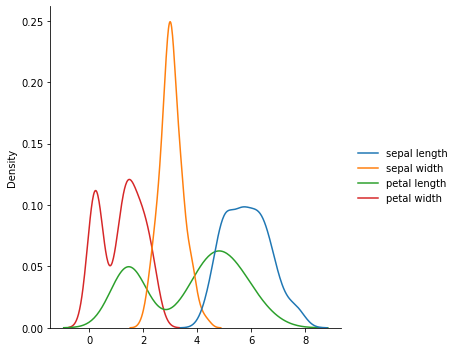

In [203]:
 sns.displot(df_iris.iloc[:,:4], kind='kde')

In [197]:
df_iris.agg(np.ptp)

sepal length    3.6
sepal width     2.4
petal length    5.9
petal width     2.4
species         2.0
dtype: float64

<AxesSubplot:ylabel='Density'>

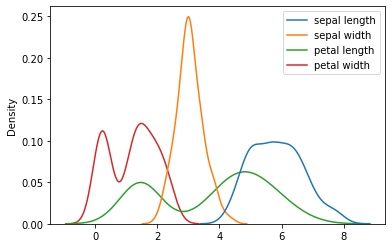

In [207]:
sns.kdeplot(data=df_iris.iloc[:,:4])

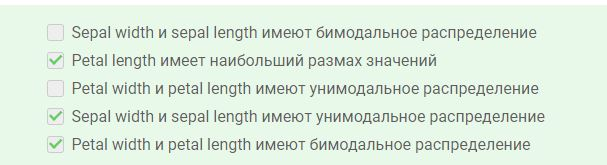

In [208]:
from IPython.display import Image
Image('Pictures/2.JPG')

### Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

<AxesSubplot:ylabel='petal length'>

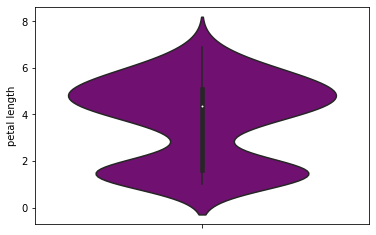

In [213]:
sns.violinplot(y=df_iris['petal length'], color='purple')

### Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

Также обратите внимание, что можно разделить на группы с помощью параметра hue.

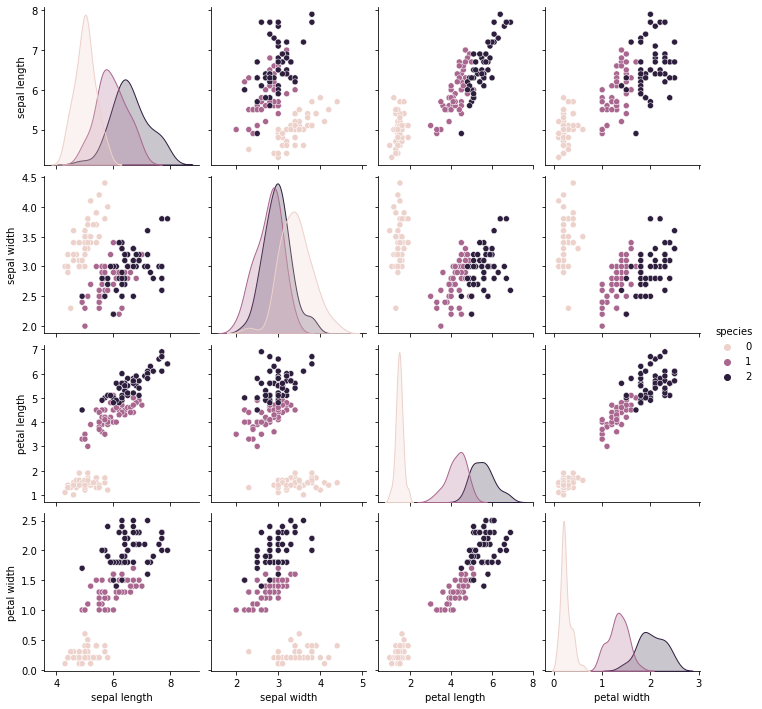

In [219]:
sns.pairplot(df_iris, vars=df_iris.columns[:4], hue="species")

In [215]:
df_iris.corr()

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


#### annot - запись значения в ячейку (аннотация)

<AxesSubplot:>

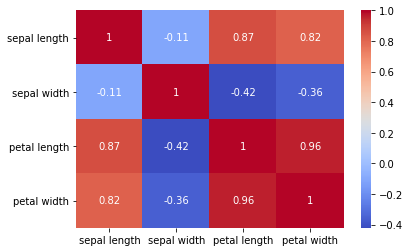

In [222]:
sns.heatmap(df_iris.iloc[:,:4].corr(), annot=True, cmap="coolwarm")